In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv(r"C:\Users\naimu\Softroniics\SUPERVISED LEARNING\loan-train (2).csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
mode= df["Gender"].mode()[0]
df["Gender"].fillna(mode,inplace=True)

In [6]:
mode = df["Married"].mode()[0]
df["Married"].fillna(mode,inplace=True)

In [7]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [8]:
replace = df["Dependents"].replace("3+",3,inplace =True)

In [9]:
df["Dependents"].unique()

array(['0', '1', '2', 3, nan], dtype=object)

In [10]:
median = df["Dependents"].median()
df["Dependents"].fillna(median,inplace =True)

In [11]:
mode = df["Self_Employed"].mode()[0]
df["Self_Employed"].fillna(mode,inplace =True)

In [12]:
median = df["LoanAmount"].median()
df["LoanAmount"].fillna(median,inplace=True)

In [13]:
median = df["Loan_Amount_Term"].median()
df["Loan_Amount_Term"].fillna(median,inplace =True)

In [14]:
median = df["Credit_History"].median()
df["Credit_History"].fillna(median,inplace =True)

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [18]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [19]:
dff=df.drop(["Loan_ID","Gender","Married"],axis =1)

In [20]:
dff.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
dff["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [22]:
en = LabelEncoder()
cat = ["Education","Self_Employed","Loan_Status","Property_Area"]

for cols in cat:
    dff[cols]= en.fit_transform(dff[cols])

In [23]:
dff.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [24]:
x= dff.drop("Loan_Status",axis =1)
y =dff["Loan_Status"]

In [25]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.3,random_state =99)

In [26]:
sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test =sc.transform(x_test)

In [27]:
print(x_test)

[[-0.75494864 -0.5585039  -0.39144068 ...  0.27662452  0.41101987
  -1.27173287]
 [-0.75494864 -0.5585039  -0.39144068 ...  0.27662452  0.41101987
  -1.27173287]
 [ 0.22946767 -0.5585039  -0.39144068 ...  0.27662452 -2.43297243
  -0.00883148]
 ...
 [-0.75494864 -0.5585039   2.55466549 ...  0.27662452  0.41101987
   1.25406991]
 [-0.75494864  1.79049779 -0.39144068 ...  0.27662452  0.41101987
  -1.27173287]
 [-0.75494864 -0.5585039  -0.39144068 ...  0.27662452  0.41101987
   1.25406991]]


In [28]:
clf = RandomForestClassifier(n_estimators =10,random_state =0)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [29]:
y_pred = clf.predict(x_test)
print(y_pred)

[0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1
 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1]


In [30]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{'{:.2f}%'.format(accuracy*100)}")


Accuracy:72.97%


In [31]:
cm = confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",cm)

confusion matrix:
 [[ 30  31]
 [ 19 105]]


In [32]:
class_report = classification_report(y_test,y_pred)
print(f"classification_report:\n{class_report}")

classification_report:
              precision    recall  f1-score   support

           0       0.61      0.49      0.55        61
           1       0.77      0.85      0.81       124

    accuracy                           0.73       185
   macro avg       0.69      0.67      0.68       185
weighted avg       0.72      0.73      0.72       185



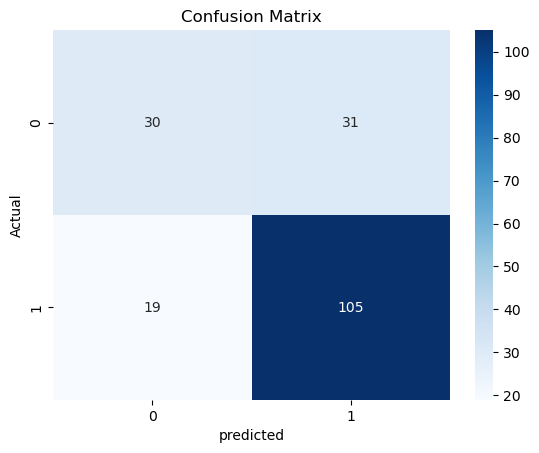

In [33]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap= "Blues",fmt ="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()